<a href="https://colab.research.google.com/github/DarthAether/python_list/blob/main/1_2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d snap/amazon-fine-food-reviews
!unzip amazon-fine-food-reviews.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
 99% 240M/242M [00:09<00:00, 28.2MB/s]
100% 242M/242M [00:09<00:00, 25.7MB/s]
Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Reviews.csv')
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [5]:
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob, Word
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')

data = {'Text': ['This is an example sentence.', 'Another sentence with some punctuation!']}
df = pd.DataFrame(data)

df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

df['Text'] = df['Text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

print(df['Text'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0                example sentence
1    another sentence punctuation
Name: Text, dtype: object


In [14]:
reviews = df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5, grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)


AttributeError: 'DataFrame' object has no attribute 'Score'

In [15]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d snap/amazon-fine-food-reviews
!unzip amazon-fine-food-reviews.zip

import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob, Word

df = pd.read_csv('Reviews.csv')

df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

df['Text'] = df['Text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

reviews = df.dropna(inplace=True)
reviews.Score.hist(bins=5, grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
amazon-fine-food-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  amazon-fine-food-reviews.zip
replace Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Reviews.csv             y
y
y

replace database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: database.sqlite         y
y

replace hashes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: hashes.txt              


KeyboardInterrupt: 

In [16]:
from wordcloud import WordCloud

review_str  = ' '.join(reviews_sample['Text'].to_numpy())

In [17]:
# Install Kaggle and set up credentials (only needed in Colab)
!pip install kaggle
from google.colab import files
# Upload your kaggle.json credentials file when prompted
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d snap/amazon-fine-food-reviews
!unzip -o amazon-fine-food-reviews.zip

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from the downloaded CSV file
df = pd.read_csv('Reviews.csv')
print("First three rows of the dataset:")
print(df.head(3))
print("\nDataset Information:")
df.info()
print("\nFirst few entries of the 'Text' column:")
print(df.Text.head())

# Text processing: import NLTK and TextBlob libraries
from nltk.corpus import stopwords
import nltk
from textblob import TextBlob, Word

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Clean and preprocess the 'Text' column in the reviews
df['Text'] = df['Text'].str.lower()  # convert to lowercase
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)  # remove punctuation

# Remove English stop words
stop_words = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# *** Text Correction Step ***
# WARNING: The following line is very slow on large datasets.
# Uncomment and use on a smaller subset if needed.
# df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

# If you want to correct text for a small subset, you can do:
# subset = df.head(100)
# subset['Text'] = subset['Text'].apply(lambda x: str(TextBlob(x).correct()))
# And then either work with 'subset' or reassign the corrected values back.

# Lemmatize the text using TextBlob's Word utility
df['Text'] = df['Text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

# Clean the dataset by dropping rows with any missing values
df.dropna(inplace=True)

# Visualize the distribution of review 'Score'
plt.figure(figsize=(8, 6))
df['Score'].hist(bins=5, grid=False)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Review Scores')
plt.show()

# Group the reviews by 'Score' and print the count of reviews per score
print("Count of reviews for each Score:")
print(df.groupby('Score').count()['Id'])


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
amazon-fine-food-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              
First three rows of the dataset:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: 

In [18]:
# Ensure that reviews_sample is defined.
# For instance, if you want to use the entire processed DataFrame:
reviews_sample = df.copy()

# Alternatively, if you prefer to work with a smaller subset for speed, you could do:
# reviews_sample = df.sample(1000, random_state=42)

# Select negative reviews (Score 1 and 2) and positive reviews (Score 4 and 5)
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1, 2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4, 5])]

# Concatenate all 'Summary' strings, using a space as a separator
negative_reviews_str = negative_reviews['Summary'].str.cat(sep=" ")
positive_reviews_str = positive_reviews['Summary'].str.cat(sep=" ")

# Optional: Print a preview of the concatenated strings
print("Negative reviews (first 500 characters):")
print(negative_reviews_str[:500])
print("\nPositive reviews (first 500 characters):")
print(positive_reviews_str[:500])


Negative reviews (first 500 characters):
Not as Advertised Cough Medicine My Cats Are Not Fans of the New Food poor taste Nasty No flavor Don't like it stale product. Taste is not so good. Warning!  WARNING!  -ALCOHOL SUGARS! nothing special No Tea Flavor Bad Low Carb Angel Food Puffs Not for me BROKEN BOTTLE BOTTOMS! Rip off Price Tasteless but low calorie Very Low quality Not Banana Runts Altoids Smalls These just don't do it for me as breath mints Nearly killed the cats CHANGED FORMULA MAKES CATS SICK!!!! Price cannot be correct Not

Positive reviews (first 500 characters):
Good Quality Dog Food "Delight" says it all Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Yay Barley Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food fresh and greasy! Strawberry Twizzlers - Yummy Lots of twizzlers, just what you expect. Love it! GREAT SWEET CANDY! Home delivered twizlers Always fresh TWIZZL

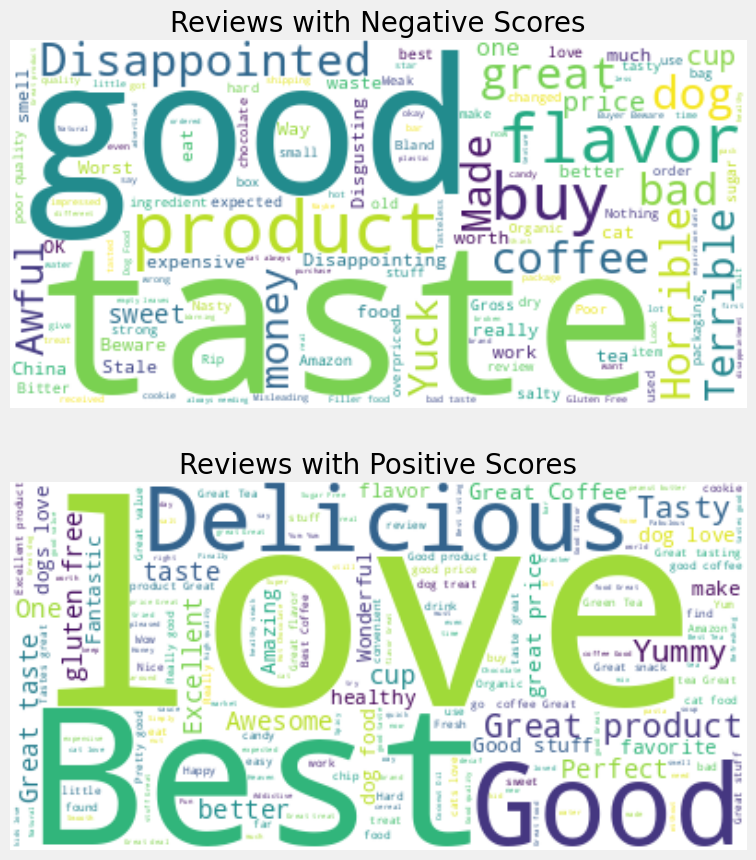

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # Correct import

# Generate word clouds for negative and positive review summaries
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

# Create a figure with two subplots for displaying the word clouds
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores', fontsize=20)

ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores', fontsize=20)

plt.show()


In [21]:
!pip install vaderSentiment

import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()

analyzer = SentimentIntensityAnalyzer()

# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Text']:
  vs=analyzer.polarity_scores(row)
  emptyline.append(vs)

y


KeyboardInterrupt: 

In [23]:
import matplotlib.pyplot as plt

result = df_c['sentiment'].value_counts()
print(result)
result.plot(kind='bar', rot=30)
plt.show()


NameError: name 'df_c' is not defined

In [26]:
!pip install emot
# create sample text data with emoji
text1 = "What are you sayin 😎. I am the boss 🤣 and why are you so 😊"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.1 MB/s eta 0:00:00


In [27]:
import re
from emot.emo_unicode import UNICODE_EMOJI
from emot.emo_unicode import EMOTICONS_EMO

def converting_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",", "").replace(":", "").split()))
    return text

converting_emojis(text1)


'What are you sayin smiling_face_with_sunglasses. I am the boss rolling_on_the_floor_laughing and why are you so smiling_face_with_smiling_eyes'

In [28]:
def emoji_removal(string):
    emoji_unicodes = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
        "]+", flags=re.UNICODE)
    return emoji_unicodes.sub(r'', string)

emoji_removal(text1)


'What are you sayin . I am the boss  and why are you so '